# Data Wrangling and EDA for Indigenous Australian Population and Australian Immunisation rates data







## Table of Content

1. [Investigate the size of Indigenous Australian Population](#1)
    - 1.1 [Investigate the Distribution of Indigenous Autralians](#1.1)
    - 1.2 [Investigate the Ages of Indigenous Australians](#1.2)
2. [Exploratory Analysis on Australian Immunisation rates](#2)
    - 2.1 [Values and Variables](#2.1)
    - 2.2 [Variations in rates over Time, Age and Location](#2.2)

## Install packages (if needed)

In [11]:
# install.packages('googleVis')
# install.packages('visdat')
# install.packages('dplyr')

## 1. Investigate the size of Indigenous Australian Population <a class="anchor" id="1"></a>

First, we need to perform some data wrangling, to ensure the quality of the data

In [2]:
#Load tidyverse library
library(tidyverse)

In [21]:
#Load the data
indig_byregion<-read_csv('IndigAusPopData_byregion.csv')
indig_byregion

#Take a look at the structure of the data
glimpse(indig_byregion)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  INDIGENOUS_REGION = col_double(),
  `Indigenous region` = col_character(),
  Age = col_character(),
  TIME = col_double(),
  Value = col_double(),
  `Projection series` = col_character(),
  Frequency = col_character()
)



INDIGENOUS_REGION,Indigenous region,Age,TIME,Value,Projection series,Frequency
801,ACT,Oct-14,2016,694,Series A,Annual
801,ACT,Oct-14,2017,696,Series A,Annual
801,ACT,Oct-14,2018,697,Series A,Annual
801,ACT,Oct-14,2019,722,Series A,Annual
801,ACT,Oct-14,2020,776,Series A,Annual
801,ACT,Oct-14,2021,792,Series A,Annual
801,ACT,Oct-14,2022,812,Series A,Annual
801,ACT,Oct-14,2023,857,Series A,Annual
801,ACT,Oct-14,2024,859,Series A,Annual
801,ACT,Oct-14,2025,841,Series A,Annual


Rows: 8,288
Columns: 7
$ INDIGENOUS_REGION   <dbl> 801, 801, 801, 801, 801, 801, 801, 801, 801, 801, ~
$ `Indigenous region` <chr> "ACT", "ACT", "ACT", "ACT", "ACT", "ACT", "ACT", "~
$ Age                 <chr> "Oct-14", "Oct-14", "Oct-14", "Oct-14", "Oct-14", ~
$ TIME                <dbl> 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 20~
$ Value               <dbl> 694, 696, 697, 722, 776, 792, 812, 857, 859, 841, ~
$ `Projection series` <chr> "Series A", "Series A", "Series A", "Series A", "S~
$ Frequency           <chr> "Annual", "Annual", "Annual", "Annual", "Annual", ~


There are some issues in the data that we need to address. We can already see some peculiar values under `Age` column, so let's investigate further.

In [22]:
levels(factor(indig_byregion$Age))

[1] "0 - 4"       "15 - 19"     "20 - 24"     "25 - 29"     "30 - 34"    
 [6] "35 - 39"     "40 - 44"     "45 - 49"     "5-Sep"       "50 - 54"    
[11] "55 - 59"     "60 - 64"     "65 and over" "Oct-14"

From here we can infer that the values under Age column is entered in the form of age group. However, there are 2 groups of values that are entered incorrectly. “5-Sep” is supposed to be “5-9” and “Oct-14” is supposed to be “10-14”. We make the changes accordingly

In [23]:
indig_byregion$Age[indig_byregion$Age=='5-Sep']<-'5 - 9'
indig_byregion$Age[indig_byregion$Age=='Oct-14']<-'10 - 14'

Now that the label of age groups is properly taken care of, we should sort the data in the ascending order of age group, so the arrangement of the data looks better

In [24]:
#Create Age_f column to rearrange the data in the ascending order of age group
indig_byregion$Age_f<-factor(indig_byregion$Age,
        levels=c("0 - 4","5 - 9" ,"10 - 14","15 - 19","20 - 24","25 - 29",
               "30 - 34","35 - 39","40 - 44","45 - 49","50 - 54","55 - 59",
               "60 - 64","65 and over"))

#Reorder the data in the ascending order of age group
indig_byregion<-indig_byregion[order(indig_byregion$Age_f),]

#Remove Age_f column when we are done
indig_byregion<-indig_byregion[,!(names(indig_byregion)=='Age_f')]

Now, we check if there are any missing values in the data

In [25]:
library(visdat)

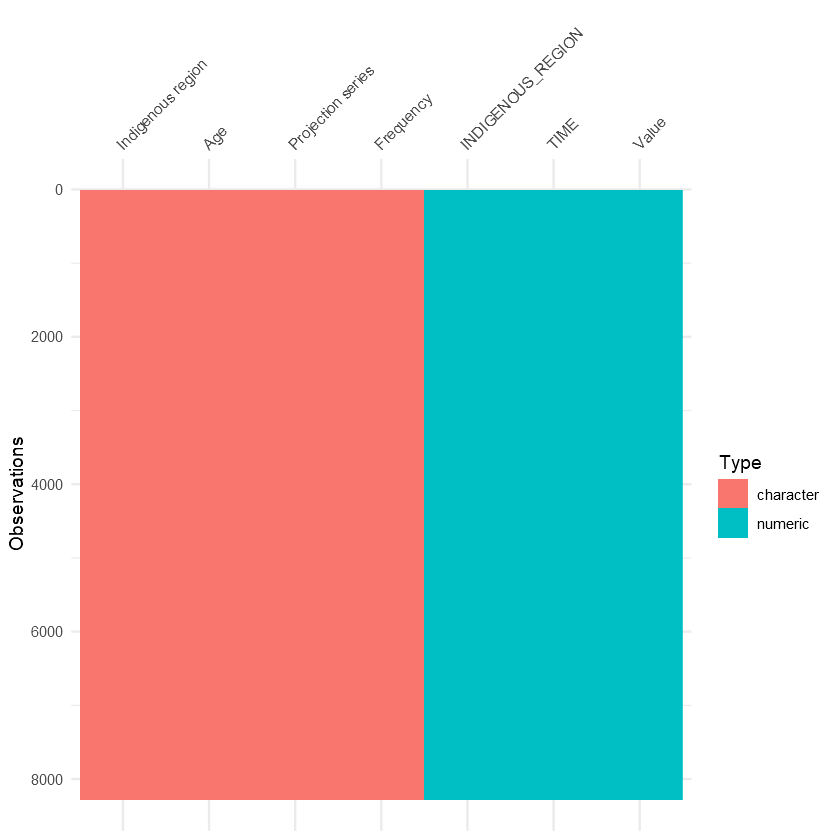

In [26]:
vis_dat(indig_byregion)
#There are no missing values

We check if the range of `TIME` and `Value` columns are within a reasonable range

In [27]:
range(indig_byregion$TIME)

[1] 2016 2031

In [28]:
range(indig_byregion$Value)

[1]    86 16347

Both are within the acceptable, specified range, so no outliers that need to be taken care of.

In [30]:
#Remove the unnecessary column INDIGENOUS_REGION
indig_byregion<-indig_byregion[,!(names(indig_byregion)=='INDIGENOUS_REGION')]

#Take a look at the data
indig_byregion

Indigenous region,Age,TIME,Value,Projection series,Frequency
ACT,0 - 4,2016,899,Series A,Annual
ACT,0 - 4,2017,901,Series A,Annual
ACT,0 - 4,2018,882,Series A,Annual
ACT,0 - 4,2019,893,Series A,Annual
ACT,0 - 4,2020,913,Series A,Annual
ACT,0 - 4,2021,947,Series A,Annual
ACT,0 - 4,2022,985,Series A,Annual
ACT,0 - 4,2023,1028,Series A,Annual
ACT,0 - 4,2024,1072,Series A,Annual
ACT,0 - 4,2025,1115,Series A,Annual


The data is now fit for further analysis

### 1.1 Investigate the Distribution of Indigenous Autralians <a class="anchor" id="1.1"></a>

To get the regions with the maximum and minimum total Indigenous populations in 2016 and 2031, firstly we need to create a new dataframe where we group by indigenous region and time, and get the total population for each instance. Here we make use of `dplyr` library to do group by and obtain the sum

In [31]:
library(dplyr)

In [36]:
colnames(indig_byregion)[1]<-'Indigenous_region'

In [39]:
tot_pop_year_region<-indig_byregion %>%
    #Groupby region and time period
    group_by(Indigenous_region,TIME) %>%
    #in each groupby, get the sum of Value
    summarize_at(vars(Value),funs(sum))

In [42]:
#To get the region with the maximum total indigenous population in 2016

#Get all the rows where Time is 2016
pop_2016<-tot_pop_year_region[tot_pop_year_region$TIME=='2016',]

#Then, Get the row with the maximum indigenous population
maxpop_2016<-pop_2016[which.max(pop_2016$Value),'Indigenous_region']

#Display the result
cat('Region with the maximum total Indigenous population in 2016 is ',as.character(maxpop_2016),'with the population of ',
    max(pop_2016$Value))

Region with the maximum total Indigenous population in 2016 is  NSW Central and North Coast with the population of  85169

In [43]:
#To get the region with the minimum total indigenous population in 2016
minpop_2016 <- pop_2016[which.min(pop_2016$Value),'Indigenous_region']
cat('Region with minimum total Indigenous population in 2016 is ',as.character(minpop_2016),
    'with the population of',min(pop_2016$Value))

Region with minimum total Indigenous population in 2016 is  Port Lincoln - Ceduna with the population of 2738

In [44]:
#To get the region with the maximum total indigenous population in 2031

#Get all the rows where Time is 2031
pop_2031<-tot_pop_year_region[tot_pop_year_region$TIME=='2031',]

#Then, Get the row with the maximum indigenous population
maxpop_2031<-pop_2031[which.max(pop_2031$Value),'Indigenous_region']

#Display the result
cat('Region with the maximum total Indigenous population in 2031 is ',as.character(maxpop_2031),'with the population of ',
    max(pop_2031$Value))

Region with the maximum total Indigenous population in 2031 is  Brisbane with the population of  129835

In [45]:
#To get the region with the minimum total indigenous population in 2031
minpop_2031 <- pop_2031[which.min(pop_2031$Value),'Indigenous_region']
cat('Region with minimum total Indigenous population in 2031 is ',as.character(minpop_2031),
    'with the population of',min(pop_2031$Value))

Region with minimum total Indigenous population in 2031 is  Port Lincoln - Ceduna with the population of 2881

Next, we find the growth rate of total indigenous population between 2016 and 2031 for each region. To do this, we merge the 2 dataframes above for the total indigenous population in 2016 and 2031.

In [46]:
pop_16_31<-merge(pop_2016,pop_2031,by.x='Indigenous_region',by.y='Indigenous_region')

In [47]:
#Next, we calculate the growth/decay rate for each region
pop_16_31$Rate<-((pop_16_31$Value.y-pop_16_31$Value.x)/pop_16_31$Value.x)*100

In [48]:
#Now we check for the region with the maximum growth rate of their total Indigenous population between 2016 and 2031
maxrate_16_31 <- pop_16_31[which.max(pop_16_31$Rate),'Indigenous_region']
cat('Region with the maximum growth rate of their total Indigenous population between 2016 and 2031 is ',
    maxrate_16_31,' with the growth rate of ',max(pop_16_31$Rate),'%')

Region with the maximum growth rate of their total Indigenous population between 2016 and 2031 is  ACT  with the growth rate of  54.90483 %

In [49]:
#Next we check for the region with the minimum growth rate of their total Indigenous population between 2016 and 2031
minrate_16_31 <- pop_16_31[which.min(pop_16_31$Rate),'Indigenous_region']
cat('Region with the minimum growth rate of their total Indigenous population between 2016 and 2031 is ',
    minrate_16_31,' with the growth rate of ',min(pop_16_31$Rate),'%')

Region with the minimum growth rate of their total Indigenous population between 2016 and 2031 is  Katherine  with the growth rate of  -8.659496 %

Now, we want to plot and describe the growth/decay of the total Indigenous populations for the capitals of 8 states/territories across all time periods. However, from the datasets, not all the capitals are present. Hence, i will make some assumptions regarding these capitals. Since Canberra is missing, ACT(Australian Capital Territory) is taken to be the data for the capital of that state. Since Hobart is missing, Tasmania is taken to be the data for the capital of that state. Since Sydney is missing, Sydney-Wollongong is taken to be the capital of NSW

In [51]:
capital_pop <- tot_pop_year_region[tot_pop_year_region$Indigenous_region %in% c('ACT',
    'Sydney - Wollongong','Darwin','Brisbane','Adelaide','Tasmania','Melbourne','Perth'),] 
capital_pop

Indigenous_region,TIME,Value
ACT,2016,7513
ACT,2017,7730
ACT,2018,7956
ACT,2019,8189
ACT,2020,8431
ACT,2021,8680
ACT,2022,8936
ACT,2023,9201
ACT,2024,9474
ACT,2025,9757


Now to get the growth rate across all time periods, for each Indigenous region, we create a function that iteratively take the difference between the upper row and the lower row in Value column and divide by the upper row, then times by 100, resulting in the growth rate in that time period. We then remove rows of year 2016, to only contain the non-zero grow rate.

In [54]:
capital_pop$rate<-ave(capital_pop$Value,capital_pop$Indigenous_region,FUN=function(x) c(0,(diff(x)/x)*100))

Warning message in diff(x)/x:
"longer object length is not a multiple of shorter object length"Warning message in diff(x)/x:
"longer object length is not a multiple of shorter object length"Warning message in diff(x)/x:
"longer object length is not a multiple of shorter object length"Warning message in diff(x)/x:
"longer object length is not a multiple of shorter object length"Warning message in diff(x)/x:
"longer object length is not a multiple of shorter object length"Warning message in diff(x)/x:
"longer object length is not a multiple of shorter object length"Warning message in diff(x)/x:
"longer object length is not a multiple of shorter object length"Warning message in diff(x)/x:
"longer object length is not a multiple of shorter object length"Warning message in x[i] <- value[[j]]:
"number of items to replace is not a multiple of replacement length"Warning message in x[i] <- value[[j]]:
"number of items to replace is not a multiple of replacement length"Warning message in x[i] <-

In [56]:
capital_pop<-capital_pop[capital_pop$TIME!='2016',]
capital_pop

Indigenous_region,TIME,Value,rate
ACT,2017,7730,2.888327
ACT,2018,7956,2.923674
ACT,2019,8189,2.928607
ACT,2020,8431,2.955184
ACT,2021,8680,2.953386
ACT,2022,8936,2.949309
ACT,2023,9201,2.965533
ACT,2024,9474,2.967069
ACT,2025,9757,2.987123
ACT,2026,10049,2.992723


Next, we plot line graphs containing growth rate of total indigenous population for 8 capitals on the same graph

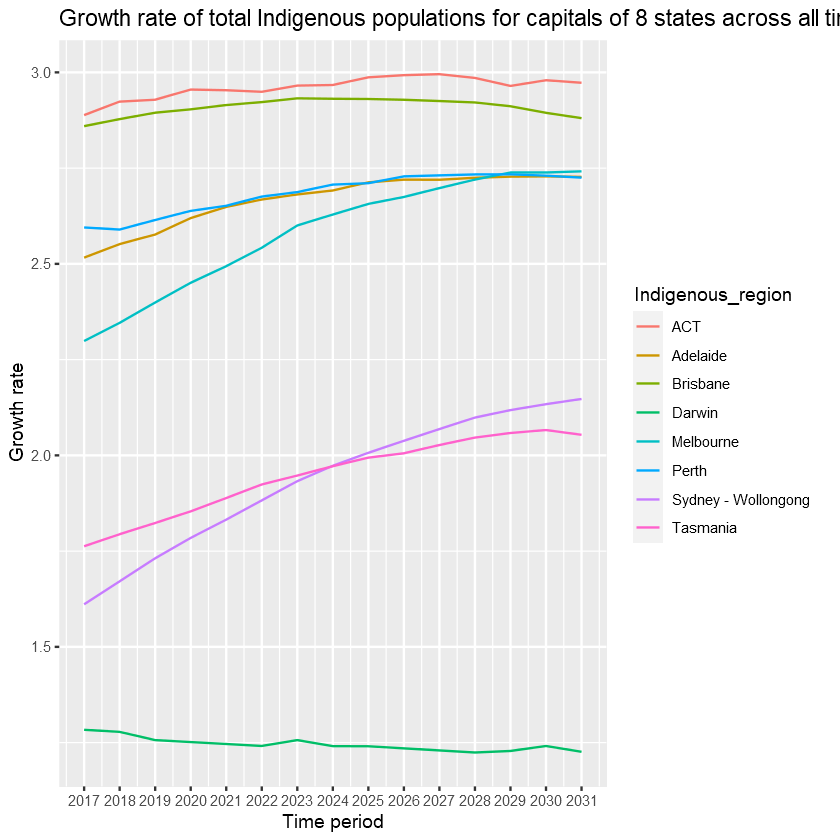

In [58]:
capital_pop %>%
    ggplot(aes(TIME,rate,colour=Indigenous_region,group=Indigenous_region)) +
    scale_x_continuous(breaks=seq(2017,2031,by=1))+
    geom_line()+
    labs(title='Growth rate of total Indigenous populations for capitals of 8 states across all time periods',
        y='Growth rate',x='Time period')

From the above graph, it seems like ACT has the highest growth rate. However, given the assumption that we take ACT as the capital of itself, since the actual capital is missing, we should take this result with a grain of salt. On the other hand, capital of Queensland - Brisbane- comes in second in terms of growth rate. Over the years, the growth rates of both of these capitals seem to be relatively consistent, hovering around 2.8% to 2.9%.

Perth, Adelaide and Melbourne come next in the list respectively. All of these 3 capitals see an increasing trend in growth rate over the year, with Melbourne having the greatest rate of increase, followed by Adelaide and Perth. It is projected that around 2029 to 2031, all 3 of these capitals will see a consistent growth rate of about 2.75%.

Tasmania and Sydney-Wollongong have a lower growth rate, but there is an increasing trend of growth rate over the years, with a more significant increase rate for Sydney-Wollongong. The growth rate is projected to increase from 1.61% in 2017 to 2.14% in 2031 for Sydney-Wollongong. Meanwhile, the numbers are 1.76% in 2017 to 2.05% in 2031 for Tasmania. However, keep in mind that these 2 are not actually capitals but only proxies.

Darwin is projected to have the lowest growth rate out of all 8 capitals, with a decreasing trend over the years. It is projected to fall from 1.28% in 2017 to 1.22% in 2031.

### 1.2 Investigate the Ages of Indigenous Australians <a class="anchor" id="1.2"></a>

On average, the lifespan of Indigenous Australians is lower than that of the overall Australian
population, due to a variety of socio-economic factors. The data give separate populations
for different ages or age groups, but because this is about living populations, not when they die,
we can’t use it to calculate average lifespans. Instead, let’s look at how many children are in the
populations.

We find which region has the highest percentage of children in its total 2016 population

In [61]:
children_2016<-indig_byregion %>%
    #Consider children to be from age 0 until 9
    filter(TIME=='2016',Age %in% c('0 - 4','5 - 9')) %>%
    group_by(Indigenous_region) %>%
    summarize_at(vars(Value),funs(sum))

In [62]:
#For each region, we calculate the percentage of children and get the region with the highest percentage
percent_2016<-merge(children_2016,pop_2016,by.x='Indigenous_region',by.y='Indigenous_region')
percent_2016$child_percent<-(percent_2016$Value.x)/(percent_2016$Value.y)*100
highest_child_region_2016<-percent_2016[which.max(percent_2016$child_percent),'Indigenous_region']
cat('Region with the highest percentage of children in its total 2016 population is ',
    highest_child_region_2016, 'with the percentage of ',max(percent_2016$child_percent),'%')

Region with the highest percentage of children in its total 2016 population is  Toowoomba - Roma with the percentage of  27.41452 %

Next, make use of `IndigAusPopData_bystate` data, we find out which state or territory has the highest percentage of children in its total 2031 populations

In [63]:
indig_bystate <-read_csv("IndigAusPopData_bystate.csv")

#We need to transform the data to a tidy long form to make analysis task later easier
indig_bystate_tidy <- gather(indig_bystate,
                             key="Year",
                             value="Value",
    "2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016",
    "2017","2018","2019","2020","2021","2022","2023","2024","2025","2026","2027",
    "2028","2029","2030","2031")

indig_bystate_tidy


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_number(),
  Age = col_character(),
  State = col_character()
)
i Use `spec()` for the full column specifications.



Age,State,Year,Value
0,NSW,2006,6024
0,Vic,2006,1255
0,QLD,2006,5324
0,SA,2006,1007
0,WA,2006,2391
0,Tas,2006,679
0,NT,2006,1446
0,ACT,2006,158
1,NSW,2006,5691
1,Vic,2006,1156


In [64]:
#For 2031 population
d2_pop_2031<- indig_bystate_tidy %>% 
  filter(Year=='2031' ) %>%
  group_by(State) %>%
  summarise_at(vars(Value),funs(sum))

d2_child_2031 <- indig_bystate_tidy %>% 
  filter(Year=='2031',Age %in% c(0:14) ) %>%
  group_by(State) %>%
  summarise_at(vars(Value),funs(sum))

d2_percent_2031 <-merge(d2_child_2031,d2_pop_2031,by.x="State",by.y="State")
d2_percent_2031['child_percent'] <-(d2_percent_2031$Value.x)/(d2_percent_2031$Value.y)*100
d2_percent_2031

State,Value.x,Value.y,child_percent
ACT,3107,11324,27.43730
NSW,112502,354771,31.71116
NT,20563,88170,23.32199
QLD,96730,304395,31.77779
SA,17292,57306,30.17485
Tas,10796,37089,29.10836
Vic,26095,83606,31.21187
WA,38318,134895,28.40580


In [66]:
d2_highest_state_2031 <-d2_percent_2031[d2_percent_2031['child_percent']==max(d2_percent_2031['child_percent']),"State"]

cat('Region with the highest percentage of children in its total 2031 population is ',d2_highest_state_2031,
    'with the percentage of ',max(d2_percent_2031['child_percent']),'%')

Region with the highest percentage of children in its total 2031 population is  QLD with the percentage of  31.77779 %

Next, we use R to build a Motion Chart comparing the total Indigenous Australian population of each
region to the percentage of Indigenous Australian children in each state/territory. Use the
region populations calculated from `IndigAusPopData_byregion` and the child percentage values calculated
from `IndigAusPopData_bystate`. The motion chart should show the population on the x-axis, the percentage on
the y-axis, the bubble size should depend on the population.

Firstly, we need to get the child percentages for each state from 2016 to 2031. The reason why we do not consider the portion of the data from 2006 to 2015 is because we will match this data with the data by region, which is only between 2016 and 2031.

The step to get the child percentage for each state is similar to what we have done. Here, we need to run a loop to get the child percentage for each year, from 2016 to 2031. First, i create an empty dataframe, then add dataframes to it.

In [67]:
percent_year_state <- data.frame(State=character(),
                 Value.x=double(),
                 Value.y=double(),
                 child_percent=double(),
                 Year=integer(),
                 stringsAsFactors = FALSE
                 )


for (year in c(2016:2031)){
  d2_pop <- indig_bystate_tidy %>%
    filter(Year==year) %>%
    group_by(State) %>%
    summarise_at(vars(Value),funs(sum))
  
  d2_child <- indig_bystate_tidy %>%
    filter(Year==year,Age %in% c(0:14)) %>%
    group_by(State) %>%
    summarise_at(vars(Value),funs(sum))
  
  d2_percent <- merge(d2_child,d2_pop,by.x="State",by.y="State")
  d2_percent['child_percent'] <- (d2_percent$Value.x)/(d2_percent$Value.y)*100
  d2_percent['Year'] <-rep(year,nrow(d2_percent))
  percent_year_state <- rbind(percent_year_state,d2_percent)
}

In [69]:
#Next, we match each region with its corresponding states.
#We add a new column “State” in tot_pop_year_region dataframe to fill in this information
tot_pop_year_region <- tot_pop_year_region %>% mutate(State=case_when(Indigenous_region %in% c("ACT") ~"ACT",
      Indigenous_region %in% c("Darwin","Dubbo","North-Eastern NSW",
  "North-Western NSW","NSW Central and North Coast","Riverina - Orange","South-Eastern NSW","Sydney - Wollongong") ~ "NSW",
  Indigenous_region %in% c("Alice Springs","Apatula","Darwin",
    "Jabiru - Tiwi","Katherine","Nhulunbuy","Tennant Creek") ~ "NT", 
  Indigenous_region %in% c("Brisbane","Cairns - Atherton","Cape York","Mount Isa","Rockhampton","Toowoomba - Roma",
                           "Torres Strait","Townsville - Mackay") ~ "QLD",
  Indigenous_region %in% c("Adelaide","Port Augusta","Port Lincoln - Ceduna") ~ "SA",
  Indigenous_region %in% c("Tasmania") ~ "Tas",
  Indigenous_region %in% c("Melbourne","Victoria exc. Melbourne") ~ "Vic",
  Indigenous_region %in% c("Broome","Geraldton","Kalgoorlie","Kununurra","Perth","South-Western WA","South Hedland",
                           "West Kimberley") ~ "WA"
  ))

Then we merge `tot_pop_year_region` with `percent_year_state`, so for any region at any given year, we will know the children percentage. We only keep the relevants columns and also rename ambiguous column’s name

In [71]:
region_pop_child <- merge(tot_pop_year_region,percent_year_state,by.x=c("State","TIME"),by.y=c("State","Year"))

region_pop_child <-region_pop_child[, !(names(region_pop_child) %in% c("Value.x","Value.y"))]
colnames(region_pop_child)[4] <- "Population"

An issue arise as there are duplicated rows in the dataframe. Remove these rows

In [72]:
region_pop_child <-region_pop_child[!duplicated(region_pop_child),]

Now we have all the data to plot the motion chart. Population as x-axis, child_percent as y-axis and bubble size depends on the population.

In [75]:
library('googleVis')

In [76]:
M1 <- gvisMotionChart(region_pop_child, idvar="Indigenous_region", timevar="TIME",
                      xvar="Population",yvar = "child_percent",sizevar = "Population")
plot(M1)

starting httpd help server ... done


By looking at Motion Chart, for region in NT(Northern Territory), as we let the slide go from 2016 to 2031, we can see that Apatula’s population overtakes Katherine’s population. It seems to happen around 2021.

For regions in NSW(New South Wales), South-Eastern NSW’s population seems to overtake that of Darwin in 2026.

In general, for regions with really large population like Brisbane, Sydney-Wollongong and NSW Central and North Coast, the percentage of children in the population is also high. However, the opposite is not always true. Regions with small population do not always also have a small percentage of children in the population. Although regions like Tennant Creek and Alice Spring both have a small population and a small percentage of children in the population, there are regions like Torres Strait and Mount Isa where the total population is small but the percentage of children is very high.

In addition, we can see than most data points cluster around the upper left region of the plot, which means a lower total population but a high percentage of children.

## 2. Exploratory Analysis on Australian Immunisation rates <a class="anchor" id="2"></a>

In [77]:
#Load data
Aus_immu <- read_csv("AusImmunisationData.csv")
head(Aus_immu)

Warning message:
"Missing column names filled in: 'X13' [13], 'X14' [14], 'X15' [15], 'X16' [16]"
-- Column specification ------------------------------------------------------------------------------------------------
cols(
  State = col_character(),
  `PHN code` = col_character(),
  `PHN area name` = col_character(),
  `Reporting Year` = col_character(),
  `Age group` = col_character(),
  `Number of registered children` = col_number(),
  `Number fully immunised` = col_number(),
  `Number not fully immunised` = col_number(),
  `Number of registered IndigAus  children` = col_character(),
  `Number IndigAus fully immunised` = col_character(),
  `Number IndigAus not fully immunised` = col_character(),
  `Interpret with caution (#)` = col_character(),
  X13 = col_logical(),
  X14 = col_logical(),
  X15 = col_logical(),
  X16 = col_logical()
)



State,PHN code,PHN area name,Reporting Year,Age group,Number of registered children,Number fully immunised,Number not fully immunised,Number of registered IndigAus children,Number IndigAus fully immunised,Number IndigAus not fully immunised,Interpret with caution (#),X13,X14,X15,X16
ACT,PHN801,Australian Capital Territory,2015-16,2 years,5679,5215,464,134,112,22,NA,NA,NA,NA,NA
ACT,PHN801,Australian Capital Territory,2014-15,2 years,5525,5051,474,124,105,19,NA,NA,NA,NA,NA
ACT,PHN801,Australian Capital Territory,2016-17,2 years,5761,5300,461,141,125,16,NA,NA,NA,NA,NA
ACT,PHN801,Australian Capital Territory,2012-13,1 year,5381,4989,392,113,101,12,NA,NA,NA,NA,NA
ACT,PHN801,Australian Capital Territory,2013-14,1 year,5513,5128,385,125,112,13,NA,NA,NA,NA,NA
ACT,PHN801,Australian Capital Territory,2012-13,2 years,5318,4955,363,120,109,11,NA,NA,NA,NA,NA


There are some columns with a lot of missing data. We investigate this further.


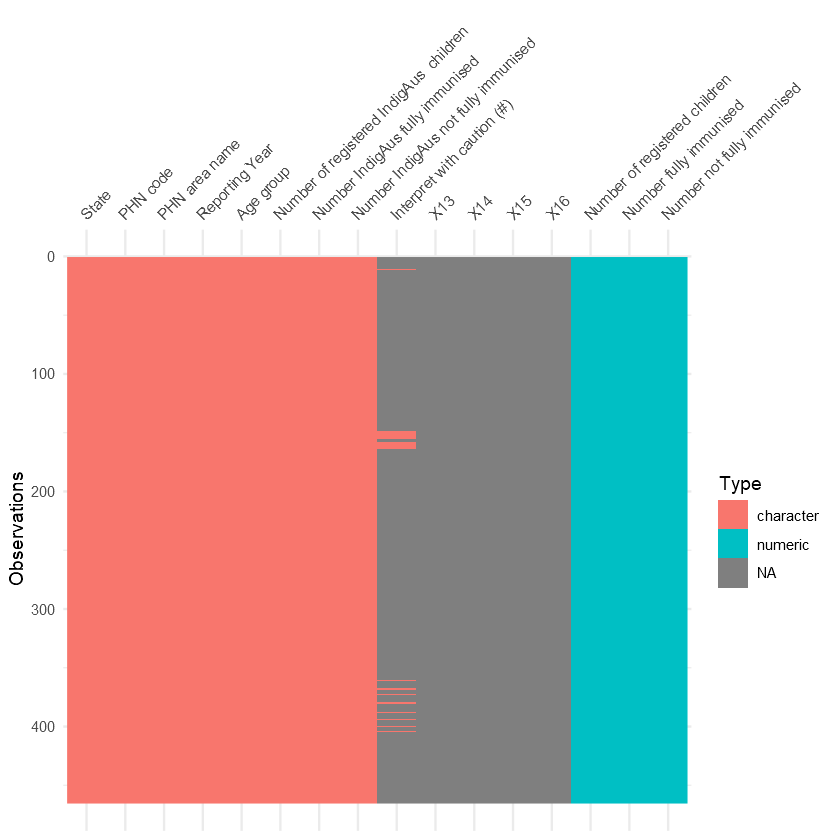

In [78]:
vis_dat(Aus_immu)

Columns `X13`,`X14`,`X15`,`X16` are completely full of missing values, so we remove these columns from the dataframe. Although column “Interpret with caution” also contains a lot of missing values, there is a context to it. This column assigns “#” to those rows that have the number of Indigenous Australian fully immunised between 26 and 100, and empty otherwise, so the missing values here also provide a sort of information. Therefore, we keep this column.

In [79]:
Aus_immu <- Aus_immu[,!(names(Aus_immu) %in% c("X13","X14","X15","X16"))]

### 2.1 Values and Variables <a class="anchor" id="2.1"></a>

In [80]:
#Let's check how many PHN areas does the data cover
no_PHN_areas <-length(unique(Aus_immu$`PHN code`))
cat("There are ",no_PHN_areas,"PHN areas that the data cover")

There are  31 PHN areas that the data cover

Next, we investigate the percentage of Australian children that are fully immunised (which is immunisation rate). We also do the same for Indigenous Australian children. 

In [81]:
#For Australian children
Aus_immu["immu_rate"] <- (Aus_immu$`Number fully immunised`)/(Aus_immu$`Number of registered children`)*100

cat("The average immunisation rates is ",mean(Aus_immu$immu_rate),"% \n")
cat("The maximum immunisation rates is ",max(Aus_immu$immu_rate),"% \n")
cat("The minimum immunisation rates is ",min(Aus_immu$immu_rate),"%")

The average immunisation rates is  92.06154 % 
The maximum immunisation rates is  96.15255 % 
The minimum immunisation rates is  86.09929 %

For Indigenous Australian children, we add a new column `ind_immu_rate` that has the percentage of Indigenous children that are fully immunised. However, we encounter a problem. In this particular portion of the dataset that we are concerned with, there are some rows with the value “NP” which stands for “Not available for Publication”. Since we cannot do numerical calculation on these values, we will have to exclude these rows from the calculation. In addition, we need to convert these numbers from character to numeric so we can perform numerical operation on them. However, before we can do this, there are some values that have “,” in the middle of the number, so we need to take care of this too.

In [82]:
filtered_Aus_immu <- Aus_immu %>% filter(!(`Number of registered IndigAus  children`=="NP"))

filtered_Aus_immu$`Number of registered IndigAus  children` <- as.numeric(gsub(",","",
                                filtered_Aus_immu$`Number of registered IndigAus  children`))

filtered_Aus_immu$`Number IndigAus fully immunised` <- as.numeric(gsub(",","",
                            filtered_Aus_immu$`Number IndigAus fully immunised`))

In [83]:
filtered_Aus_immu["ind_immu_rate"] <- (filtered_Aus_immu$`Number IndigAus fully immunised`)/
    (filtered_Aus_immu$`Number of registered IndigAus  children`)*100

In [84]:
cat("The average immunisation rates for Indigenous children is ",mean(filtered_Aus_immu$ind_immu_rate),"% \n")
cat("The maximum immunisation rates for Indigenous children is ",max(filtered_Aus_immu$ind_immu_rate),"% \n")
cat("The minimum immunisation rates for Indigenous children is ",min(filtered_Aus_immu$ind_immu_rate),"%")

The average immunisation rates for Indigenous children is  89.92436 % 
The maximum immunisation rates for Indigenous children is  97.68977 % 
The minimum immunisation rates for Indigenous children is  73.77049 %

These values seem statistically reasonable to me. Due to various socio_economic factors, immunisation rate of Indigenous children would generally be lower than that of the overall population.

### 2.2 Variations in rates over Time, Age and Location <a class="anchor" id="2.2"></a>

Next, we investigate to see the interaction between immunisation rates and other factors such as year and age.

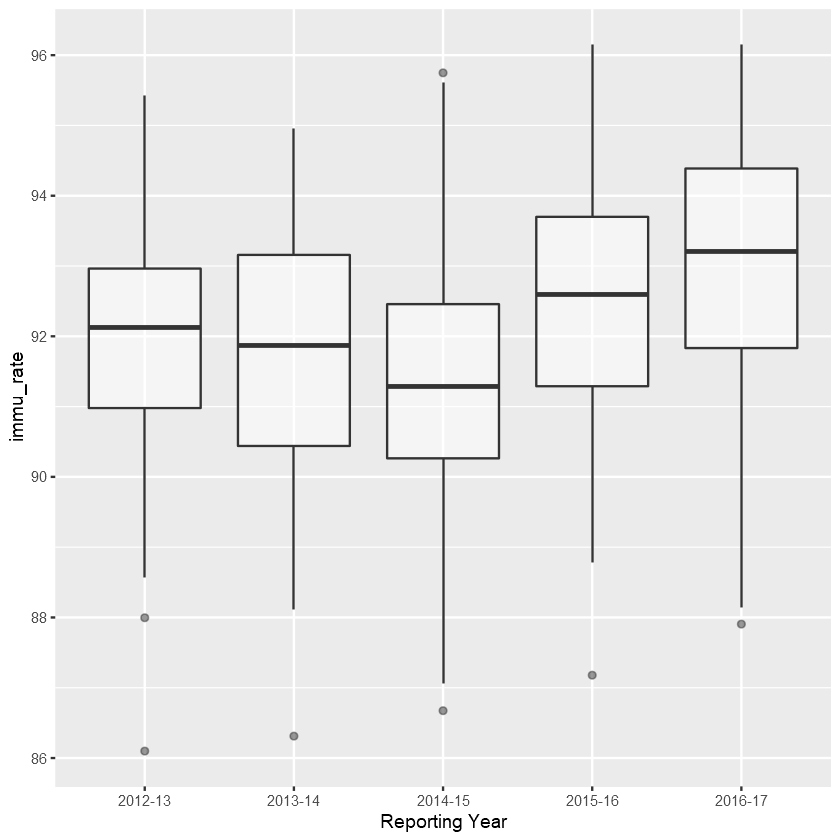

In [85]:
#Boxplot of immunisation rate versus year
Aus_immu %>% ggplot(aes(`Reporting Year`,immu_rate))+
  geom_boxplot(alpha=0.5)

In general, immunisation rates have improved over time, as the box plot is at a higher immunisation rate in 2016-2017, as compared to 2012-2013.

The median, which is the middle line in the box plots, increases. However, this trend is not always the case over the years. The median actually falls first, at a lower immunisation rate in 2014-2015, as compared to 2012-2013. Then after that, it increases back again and in 2016-2017, it reaches a level of immunisation rates that is higher than that in 2012-2013.

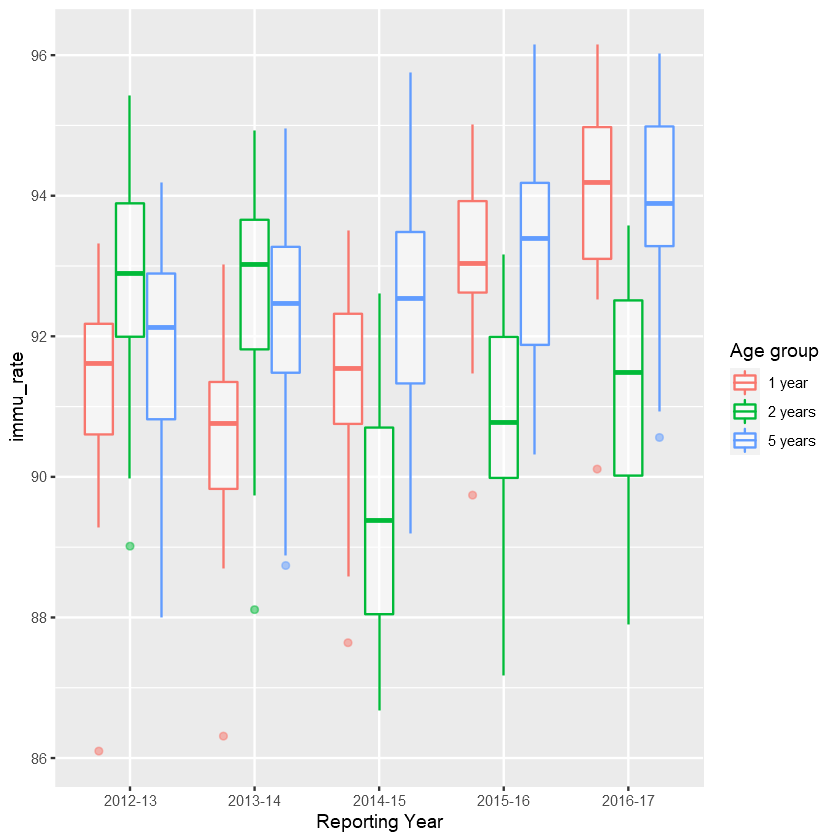

In [86]:
#To account for age, we can also plot grouped boxplot
Aus_immu %>% ggplot(aes(`Reporting Year`,immu_rate,colour=`Age group`))+
  geom_boxplot(alpha=0.5)

From the graph, we can see that for the age group of 1 year, immunisation rates improved over time, as the red box plot representing this group is at a higher immunisation rate in 2016-2017, as compared to 2012-2013.

For the age group of 2 years, we actually see an overall fall in immunisation rates between 2012-2013 and 2016-2017 as the green box plot representing this group is at a lower immunisation rate in 2016-2017, as compared to 2012-2013. However, from 2014-2015 onwards, there is an increasing trend in immunisation rate for this group

For the age group of 5 years, there is a slight improvement in immunisation rates over time, as the blue box plot representing this group is at a higher immunisation rate in 2016-2017, as compared to 2012-2013

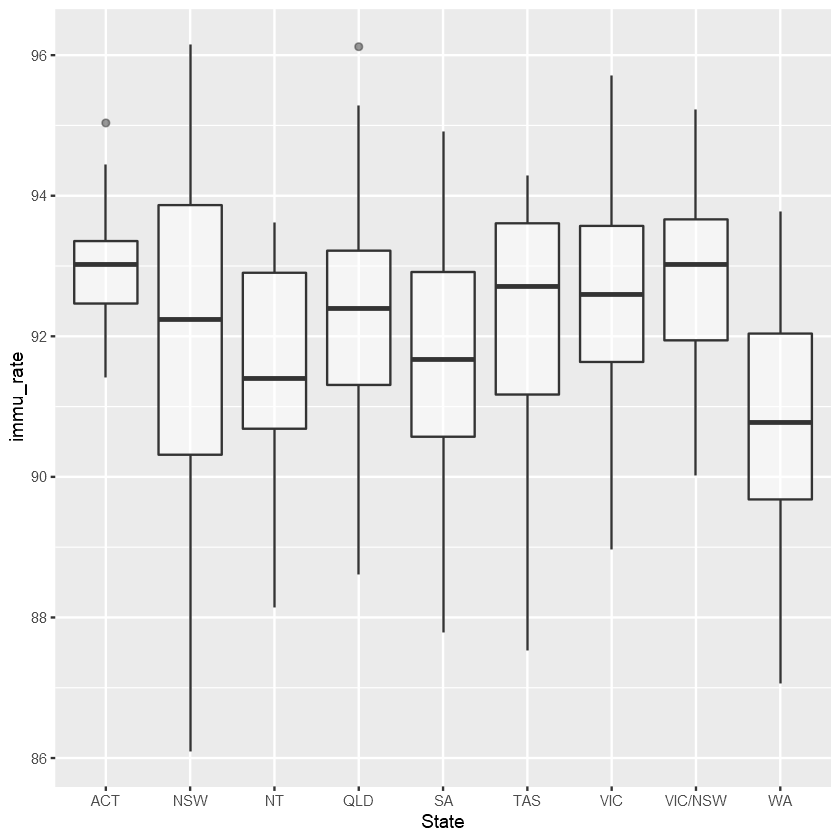

In [87]:
#Generate boxplot of immunisation rate versus State
Aus_immu %>% ggplot(aes(State,immu_rate))+
  geom_boxplot(alpha=0.5)

To determine which states is the most consistent in their immunisation rates, we look for the box plot that is the shortest, with the length between maximum observation (that is below upper inner fence) and minimum observation (that is above lower inner fence) being the shortest as well. It is because this means the variance in immunisation rates is not high.

ACT box plot seems to fit this criteria, so ACT is the most consistent in their immunisation rates.